# Projection des données sur un espace 2D
Ce notebook a comme objectif explorer le potentielle de le changement par répresentation.

In [32]:
from cookie_clusters import *

In [33]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [34]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

matrice_nir = pd.read_csv('../data/processed/vec_nir.csv').to_numpy()
matrice_rouge = pd.read_csv('../data/processed/vec_red.csv').to_numpy()
matrice_vert = pd.read_csv('../data/processed/vec_green.csv').to_numpy()
matrice_bleu = pd.read_csv('../data/processed/vec_blue.csv').to_numpy()
matrice_ndvi = pd.read_csv('../data/processed/vec_ndvi.csv').to_numpy()
matrice_ndwi = pd.read_csv('../data/processed/vec_ndwi.csv').to_numpy()

# Bande Rouge

Axes(0.125,0.11;0.775x0.77)


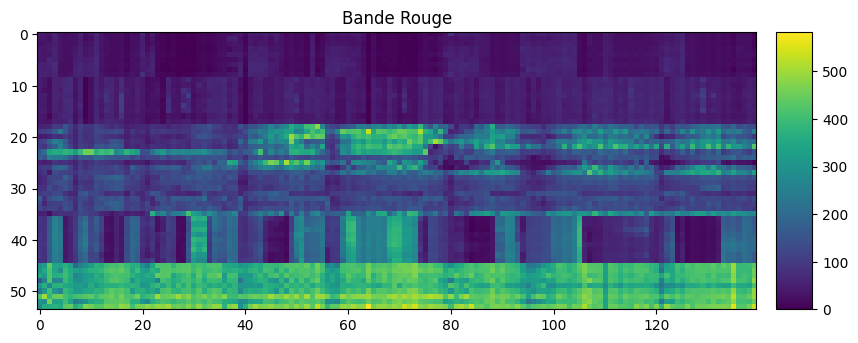

In [35]:
matrice = np.delete(matrice_rouge,22,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande Rouge')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [36]:
import umap
reducer = umap.UMAP(random_state=42)

In [37]:
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(54, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

In [38]:
support_matrice = pd.DataFrame(matrice)
support_matrice.head()

classes = list()

for i in pixels_de_interet:
    for j, k in zip(list(dic_de_pixels.keys()), range(0, len(list(dic_de_pixels.keys())))):
        if i in list(dic_de_pixels[j]):
            classes.append(k)


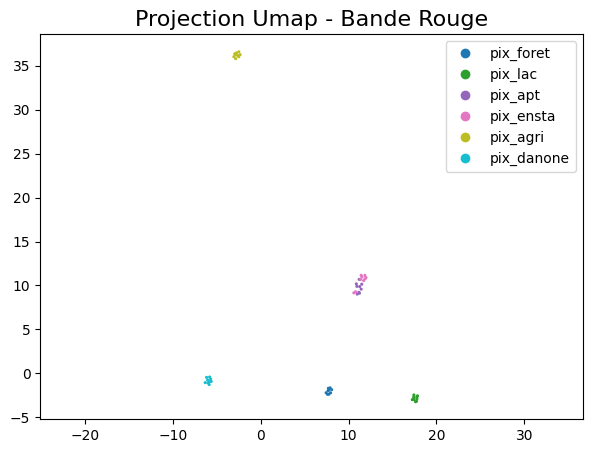

In [39]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande Rouge', fontsize=16)
plt.show()

## Paranthesis : Triying a HDBSCAN over this new representation.

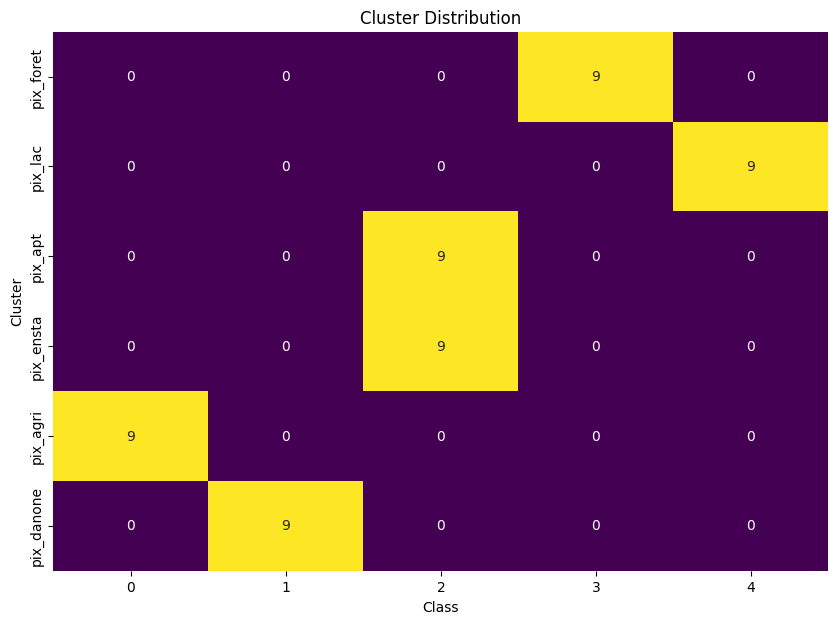

In [40]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_rouge = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_rouge, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande Verte

Axes(0.125,0.11;0.775x0.77)


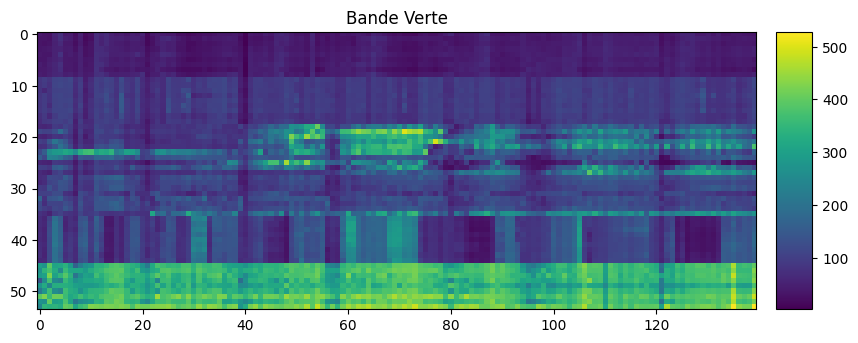

In [41]:
matrice = np.delete(matrice_vert,22,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande Verte')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [42]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(54, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

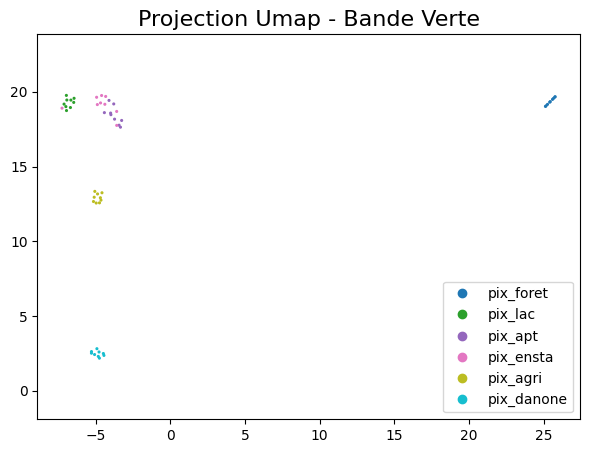

In [43]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande Verte', fontsize=16)
plt.show()


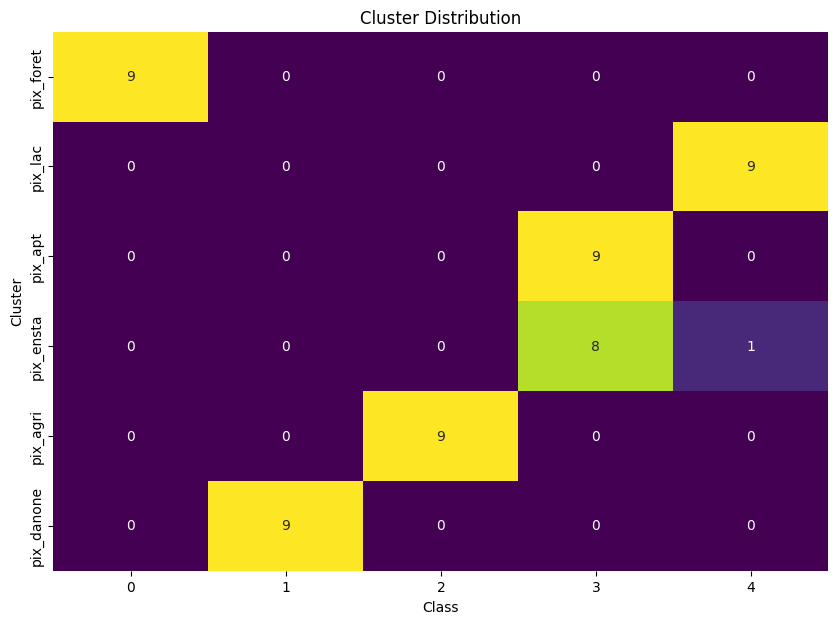

In [44]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_vert = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_vert, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande Bleue

Axes(0.125,0.11;0.775x0.77)


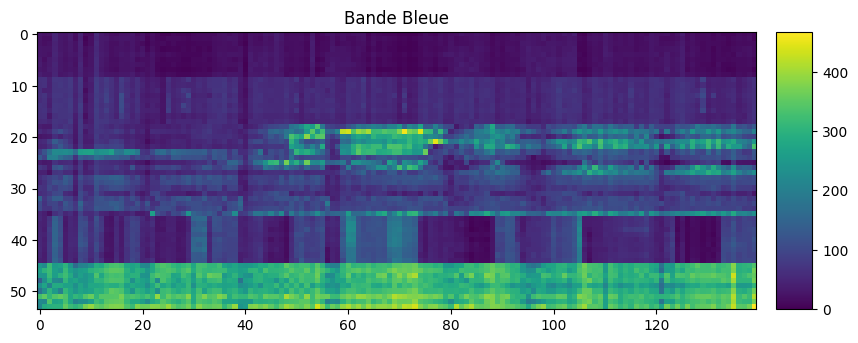

In [45]:
matrice = np.delete(matrice_bleu,22,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande Bleue')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [46]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(54, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

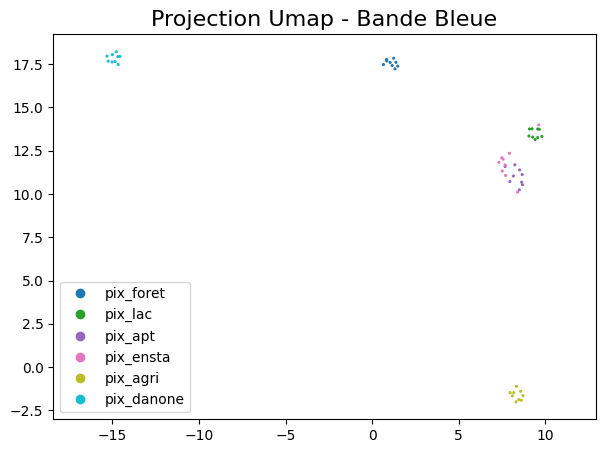

In [47]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande Bleue', fontsize=16)
plt.show()

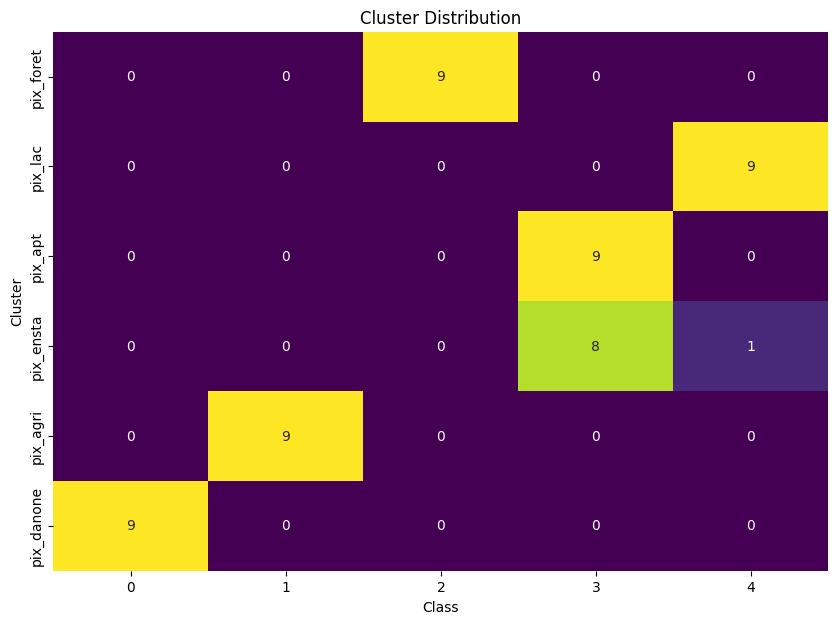

In [48]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_bleu = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_bleu, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande NDVI

Axes(0.125,0.11;0.775x0.77)


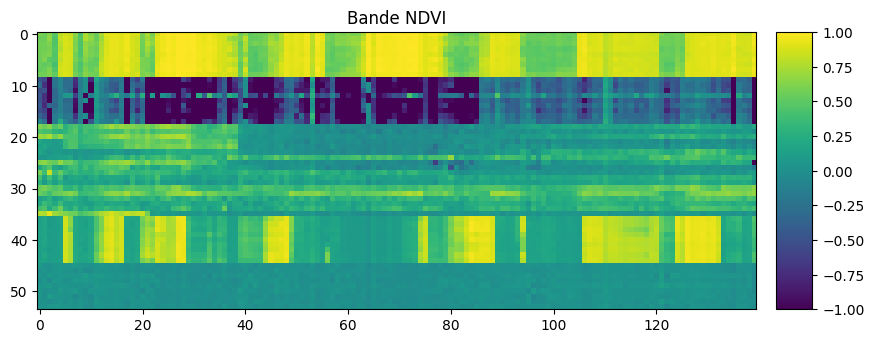

In [49]:
matrice = np.delete(matrice_ndvi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Bande NDVI')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [50]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(54, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

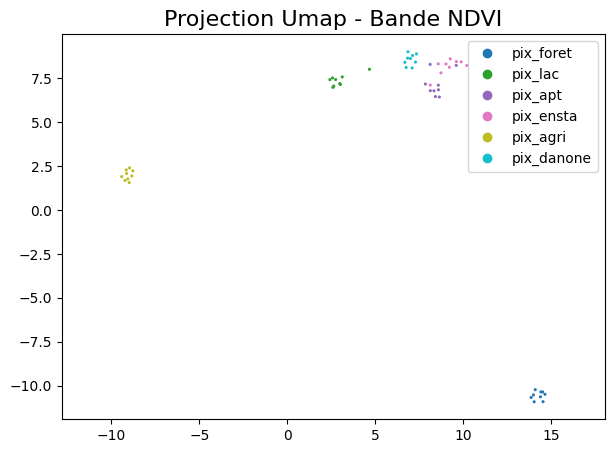

In [51]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande NDVI', fontsize=16)
plt.show()

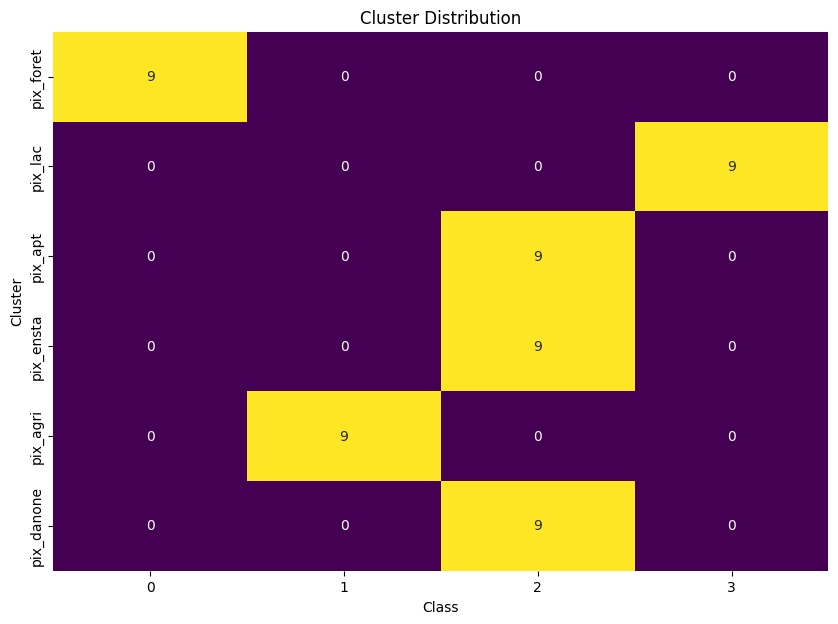

In [52]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_ndvi = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_ndvi, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande NDWI

Axes(0.125,0.11;0.775x0.77)


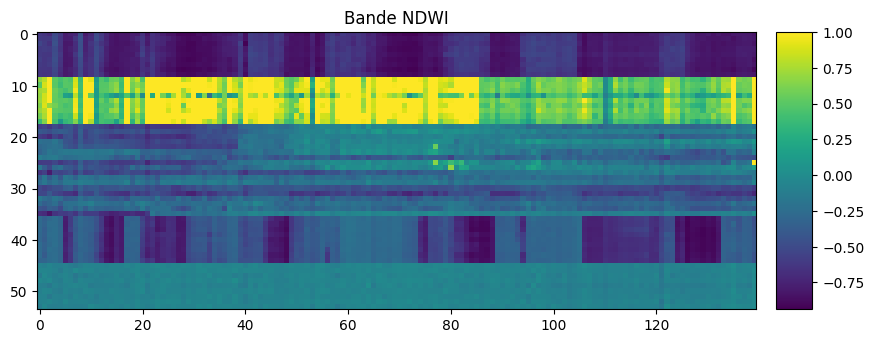

In [53]:
matrice = np.delete(matrice_ndwi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Bande NDWI')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [54]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(54, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

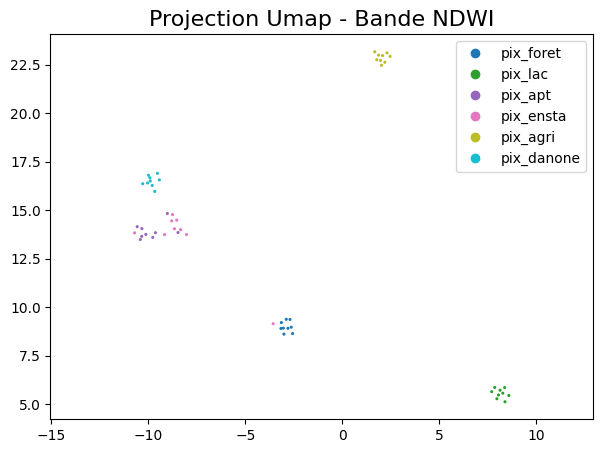

In [55]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande NDWI', fontsize=16)
plt.show()

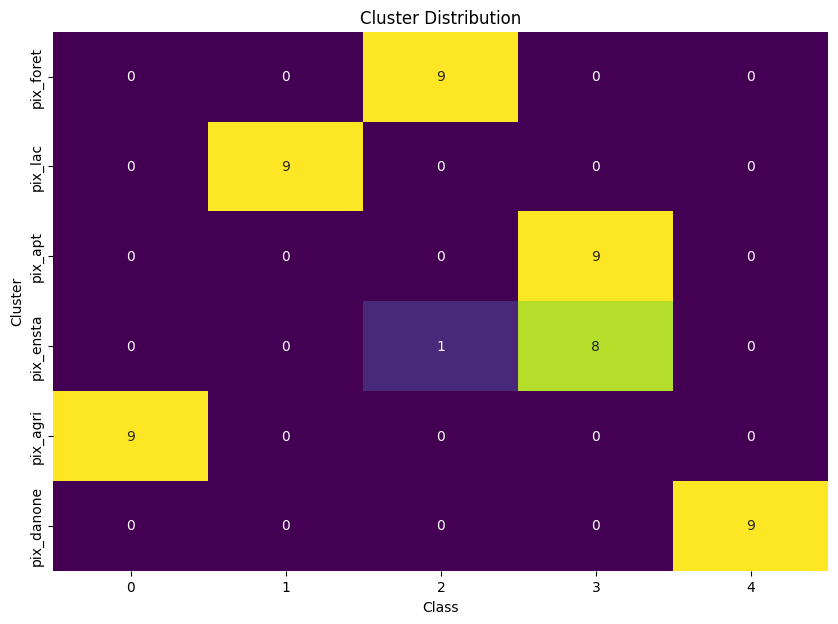

In [56]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_ndwi = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_ndwi, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# t-SNE

In [57]:
from openTSNE import TSNE

## Bande Rouge

In [58]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_rouge,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.32 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.07 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 0.9982, 50 iterations in 3.8543 sec
Iteration  100, KL divergence 0.9984, 50 iterations in 4.2349 sec
Iteration  150, KL divergence 0.9851, 50 iterations in 4.2388 sec
Iteration  200, KL divergence 0.9851, 50 iterations in 4.2153 sec
Iteration  250, KL divergence 0.9852, 50 iterations in 4.2640 sec
   --> Time elapsed: 20.81 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

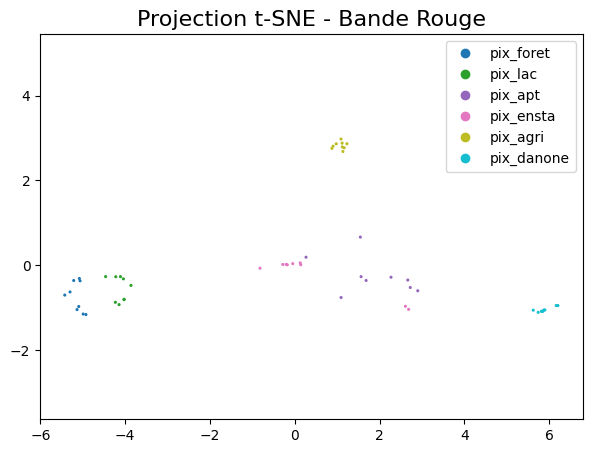

In [59]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande Rouge', fontsize=16)
plt.show()

## Bande Verte

In [60]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_vert,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence -1.0589, 50 iterations in 2.5834 sec
Iteration  100, KL divergence 0.9922, 50 iterations in 0.6278 sec
Iteration  150, KL divergence 0.9922, 50 iterations in 0.1320 sec
Iteration  200, KL divergence 0.9922, 50 iterations in 0.1278 sec
Iteration  250, KL divergence 0.9922, 50 iterations in 0.1290 sec
   --> Time elapsed: 3.60 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

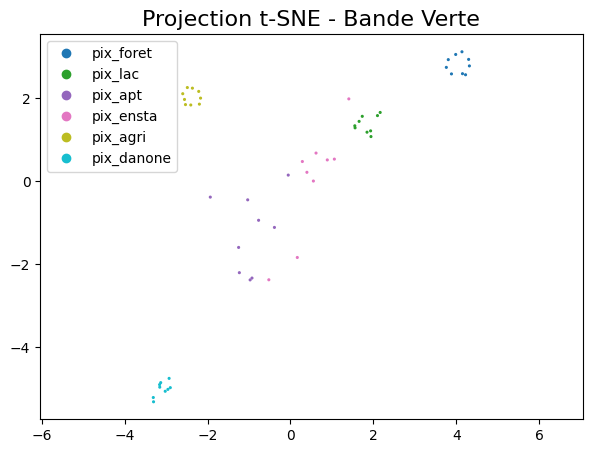

In [61]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande Verte', fontsize=16)
plt.show()

## Bande Bleue

In [62]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_bleu,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence -0.5575, 50 iterations in 2.8777 sec
Iteration  100, KL divergence -0.2100, 50 iterations in 1.9562 sec
Iteration  150, KL divergence 1.0087, 50 iterations in 0.5760 sec
Iteration  200, KL divergence 1.0087, 50 iterations in 0.1278 sec
Iteration  250, KL divergence 1.0087, 50 iterations in 0.1265 sec
   --> Time elapsed: 5.66 seconds
===> Running optimization with exaggeration=1.00, lr=54.00

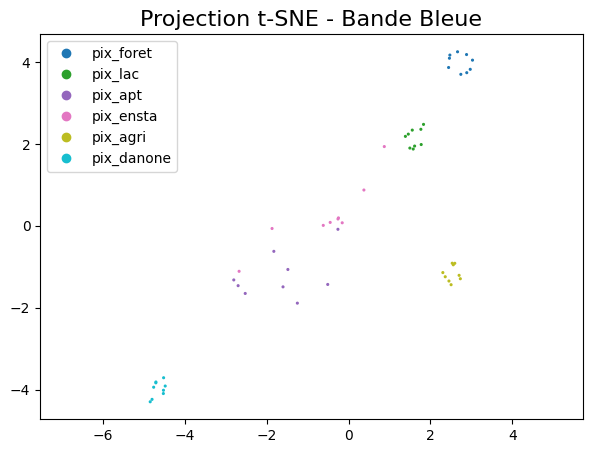

In [63]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande Bleue', fontsize=16)
plt.show()

## Bande NIR

In [64]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_nir,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 0.8923, 50 iterations in 3.4836 sec
Iteration  100, KL divergence 0.7087, 50 iterations in 3.2347 sec
Iteration  150, KL divergence 0.8748, 50 iterations in 3.1285 sec
Iteration  200, KL divergence 0.9350, 50 iterations in 3.2543 sec
Iteration  250, KL divergence 0.9462, 50 iterations in 3.2152 sec
   --> Time elapsed: 16.32 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

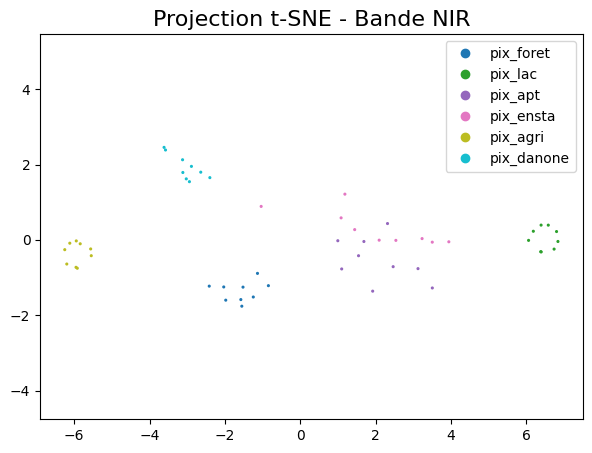

In [65]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande NIR', fontsize=16)
plt.show()

## Bande NDVI

In [66]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_ndvi,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 1.0293, 50 iterations in 3.8019 sec
Iteration  100, KL divergence 0.9935, 50 iterations in 4.1293 sec
Iteration  150, KL divergence 0.9966, 50 iterations in 4.2396 sec
Iteration  200, KL divergence 0.9963, 50 iterations in 4.1137 sec
Iteration  250, KL divergence 0.9964, 50 iterations in 4.2881 sec
   --> Time elapsed: 20.57 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

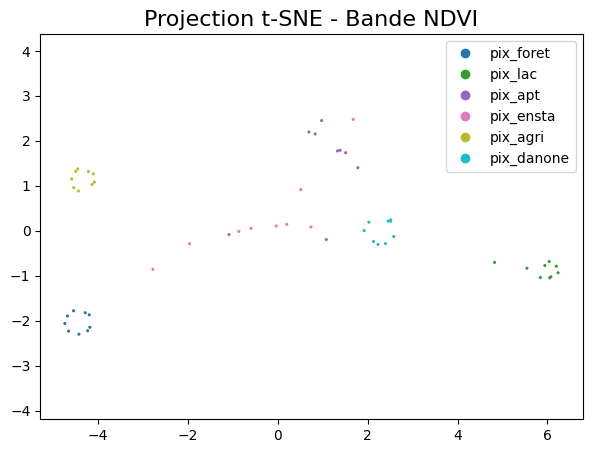

In [67]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande NDVI', fontsize=16)
plt.show()

## Bande NDWI

In [68]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_ndwi,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 0.9210, 50 iterations in 3.9193 sec
Iteration  100, KL divergence 0.9356, 50 iterations in 4.1334 sec
Iteration  150, KL divergence 0.9366, 50 iterations in 4.2779 sec
Iteration  200, KL divergence 0.9334, 50 iterations in 4.2880 sec
Iteration  250, KL divergence 0.9363, 50 iterations in 4.3570 sec
   --> Time elapsed: 20.98 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

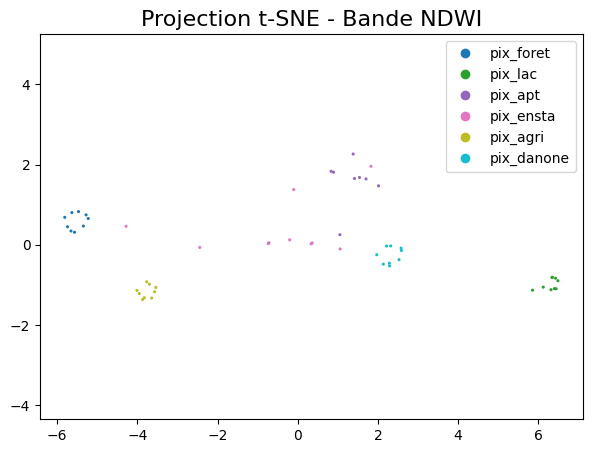

In [69]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande NDWI', fontsize=16)
plt.show()